In [8]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [9]:
## extra imports to set GPU options
import tensorflow as tf
from keras import backend as k

###################################
# TensorFlow wizardry
config = tf.ConfigProto()

# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True

# Only allow a total of half the GPU memory to be allocated
config.gpu_options.per_process_gpu_memory_fraction = 1 # 0.5 for Half

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))


In [10]:
#matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist

In [11]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import os
import pyqrcode
import re
from collections import *
import this
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
import seaborn as sn
import pandas as pd
import numpy as np
import linecache
import sys
import h5py
import itertools
import matplotlib.pyplot as plt
import os
import pickle
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import RemoteMonitor
from keras.layers.merge import concatenate
from keras.layers import AveragePooling2D, Convolution2D, Dense, Dropout, Flatten, Input, MaxPooling2D, ZeroPadding2D 
from keras.models import Model, Sequential

In [12]:
# from tf.keras.models import Sequential  # This does not work!
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

This was developed using Python 3.6 (Anaconda) and package versions:

In [13]:
tf.__version__

'1.9.0'

In [14]:
tf.keras.__version__

'2.1.6-tf'

## Load Data

We will use a data-set consisting of 50000 reviews of movies from IMDB. Keras has a built-in function for downloading a similar data-set (but apparently half the size). However, Keras' version has already converted the text in the data-set to integer-tokens, which is a crucial part of working with natural languages that will also be demonstrated in this tutorial, so we download the actual text-data.

NOTE: The data-set is 84 MB and will be downloaded automatically.

In [15]:
import time
#import imdb
relevant_path = "/data/danish/Data/IoT_Malware_Opcodes/benign_Sequences/"
print(relevant_path)

included_extentions = ['txt']
file_names = [fn for fn in os.listdir(relevant_path)
              if any(fn.endswith(ext) for ext in included_extentions)]
print(len(file_names))

X = []
Y = []
wordCounter_benign = dict()
time_ = []

for fn in file_names:
    tic = time.time();
    with open('/data/danish/Data/IoT_Malware_Opcodes/benign_Sequences/'+fn,'r') as fh:
        for line in fh:
            # Replacing punctuation characters. Making the string to lower.
            # The split will spit the line into a list.
            word_list = line.replace(',','').replace('\'','').replace('.','').lower().split()
        for word in word_list:
              # Adding  the word into the wordCounter dictionary.
            if word not in wordCounter_benign:
                wordCounter_benign[word] = 1
            else:
                # if the word is already in the dictionary update its count.
                wordCounter_benign[word] = wordCounter_benign[word] + 1
        toc = time.time();
        time_.append(toc-tic)
        #print ("Elasped Time (s) = ", toc-tic);
      

    key=' '.join('{}'.format(keys) for keys in wordCounter_benign.keys())
    #value=' '.join('{}'.format(values) for values in wordCounter_benign.values())

    X.append(key)
    Y.append(0)
    
    
print(len(X))
print(len(Y)) 
print("Average Time is =", np.mean(time_))




/data/danish/Data/IoT_Malware_Opcodes/benign_Sequences/
271
271
271
Average Time is = 0.0218846419641


In [16]:
#import imdb
relevant_path = "/data/danish/Data/IoT_Malware_Opcodes/malicious_Sequences/"
print(relevant_path)

included_extentions = ['txt']
file_names = [fn for fn in os.listdir(relevant_path)
              if any(fn.endswith(ext) for ext in included_extentions)]
print(len(file_names))
wordCounter_malicious = dict()

for fn in file_names:
    with open('/data/danish/Data/IoT_Malware_Opcodes/malicious_Sequences/'+fn,'r') as fh:
        for line in fh:
            # Replacing punctuation characters. Making the string to lower.
            # The split will spit the line into a list.
            word_list = line.replace(',','').replace('\'','').replace('.','').lower().split()
        for word in word_list:
              # Adding  the word into the wordCounter dictionary.
            if word not in wordCounter_malicious:
                wordCounter_malicious[word] = 1
            else:
                # if the word is already in the dictionary update its count.
                wordCounter_malicious[word] = wordCounter_malicious[word] + 1
        
      

    key=' '.join('{}'.format(keys) for keys in wordCounter_malicious.keys())
    #value=' '.join('{}'.format(values) for values in wordCounter_malicious.values())

    X.append(key)
    Y.append(1)
    
    
print(len(X))
print(len(Y)) 

/data/danish/Data/IoT_Malware_Opcodes/malicious_Sequences/
280
551
551


In [17]:
x_train_text, x_test_text, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
print(len(x_train_text))
print(len(y_train)) 
print(len(x_test_text))
print(len(y_test)) 

440
440
111
111


In [19]:
print("Train-set size: ", len(x_train_text))
print("Test-set size:  ", len(x_test_text))


Train-set size:  440
Test-set size:   111


In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

In [21]:
#data_text = np.hstack((x_train_text,x_test_text))
#data_text.shape
data_text = x_train_text + x_test_text
data_text.shape

(551,)

In [22]:
num_words = None

In [23]:
tokenizer = Tokenizer(num_words=num_words)
#tokenizer_1 = Tokenizer(2000)

In [51]:
tic = time.time();

tokenizer.fit_on_texts(data_text)

toc = time.time();
print ("Elasped Time (s) = ", toc-tic);
#tokenizer.fit_on_texts(data_text)

Elasped Time (s) =  0.3368980884552002


In [25]:
len(data_text)

551

If you want to use the entire vocabulary then set `num_words=None` above, and then it will automatically be set to the vocabulary-size here. (This is because of Keras' somewhat awkward implementation.)

In [26]:
if num_words is None:
    num_words = len(tokenizer.word_index)


In [27]:
num_words

658

We can then inspect the vocabulary that has been gathered by the tokenizer. This is ordered by the number of occurrences of the words in the data-set. These integer-numbers are called word indices or "tokens" because they uniquely identify each word in the vocabulary.

In [28]:
#tokenizer.word_index
#tokenizer_1.word_index

In [29]:
#tokenizer_1.word_index

We can then use the tokenizer to convert all texts in the training-set to lists of these tokens.

In [50]:
#%%time
tic = time.time();

x_train_tokens = tokenizer.texts_to_sequences(x_train_text)

toc = time.time();
print ("Elasped Time (s) = ", toc-tic);


Elasped Time (s) =  0.18138837814331055


In [31]:
#x_train_tokens[1]

For example, here is a text from the training-set:

In [32]:
#x_train_text[1]

This text corresponds to the following list of tokens:

In [33]:
#x_train_tokens[1]
#np.array(x_train_tokens[1])

We also need to convert the texts in the test-set to tokens.

In [34]:
%%time
x_test_tokens = tokenizer.texts_to_sequences(x_test_text)

CPU times: user 43.5 ms, sys: 58 µs, total: 43.6 ms
Wall time: 43.3 ms


In [35]:
#x_test_tokens[0]

## Padding and Truncating Data

The Recurrent Neural Network can take sequences of arbitrary length as input, but in order to use a whole batch of data, the sequences need to have the same length. There are two ways of achieving this: (A) Either we ensure that all sequences in the entire data-set have the same length, or (B) we write a custom data-generator that ensures the sequences have the same length within each batch.

Solution (A) is simpler but if we use the length of the longest sequence in the data-set, then we are wasting a lot of memory. This is particularly important for larger data-sets.

So in order to make a compromise, we will use a sequence-length that covers most sequences in the data-set, and we will then truncate longer sequences and pad shorter sequences.

First we count the number of tokens in all the sequences in the data-set.

In [36]:
%%time
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

CPU times: user 185 µs, sys: 5 µs, total: 190 µs
Wall time: 198 µs


The average number of tokens in a sequence is:

In [37]:
np.mean(num_tokens)

503.9364791288566

The maximum number of tokens in a sequence is:

In [38]:
np.max(num_tokens)

600

The max number of tokens we will allow is set to the average plus 2 standard deviations.

In [39]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

656

This covers about 95% of the data-set.

In [40]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

1.0

When padding or truncating the sequences that have a different length, we need to determine if we want to do this padding or truncating 'pre' or 'post'. If a sequence is truncated, it means that a part of the sequence is simply thrown away. If a sequence is padded, it means that zeros are added to the sequence.

So the choice of 'pre' or 'post' can be important because it determines whether we throw away the first or last part of a sequence when truncating, and it determines whether we add zeros to the beginning or end of the sequence when padding. This may confuse the Recurrent Neural Network.

In [41]:
pad = 'pre'

In [52]:
tic = time.time();

x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens,
                            padding=pad, truncating=pad)
toc = time.time();
print ("Elasped Time (s) = ", toc-tic);


Elasped Time (s) =  0.04354357719421387


In [43]:
%%time
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens,
                           padding=pad, truncating=pad)

CPU times: user 8.73 ms, sys: 13 µs, total: 8.75 ms
Wall time: 7.85 ms


We have now transformed the training-set into one big matrix of integers (tokens) with this shape:

In [44]:
x_train_pad.shape

(440, 656)

The matrix for the test-set has the same shape:

In [45]:
x_test_pad.shape

(111, 656)

For example, we had the following sequence of tokens above:

## Tokenizer Inverse Map

For some strange reason, the Keras implementation of a tokenizer does not seem to have the inverse mapping from integer-tokens back to words, which is needed to reconstruct text-strings from lists of tokens. So we make that mapping here.

In [46]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

Helper-function for converting a list of tokens back to a string of words.

In [47]:
def tokens_to_string(tokens):
    # Map from tokens back to words.
    words = [inverse_map[token] for token in tokens if token != 0]
    
    # Concatenate all words.
    text = " ".join(words)

    return text

For example, this is the original text from the data-set:

In [48]:
#x_train_text[1]

We can recreate this text except for punctuation and other symbols, by converting the list of tokens back to words:

In [49]:
#tokens_to_string(x_train_tokens[1])

## Performance on Test-Set

Now that the model has been trained we can calculate its classification accuracy on the test-set.

In [43]:
#from keras import regularizers
from keras.regularizers import l2


# define the architecture of the network
model = Sequential()
model.add(Dense(50, input_dim=656, init="uniform", activation="relu"))#,kernel_regularizer=l2(0.001)))#, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation="relu",kernel_initializer="uniform"))#, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation='softmax'))


/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=656, activation="relu", kernel_initializer="uniform")`
  import sys


In [44]:
from keras.optimizers import SGD

adam = Adam(lr=1e-3)
sgd = SGD(lr=0.01, decay=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                32850     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 33,371
Trainable params: 33,371
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
%%time
history = model.fit(x_train_pad, y_train,
          validation_data=(x_test_pad, y_test), epochs=50, batch_size=64)


Train on 440 samples, validate on 111 samples
Epoch 1/50
440/440 [==============================] - 1s 3ms/step - loss: 8.3882 - acc: 0.4614 - val_loss: 7.0322 - val_acc: 0.5586
Epoch 2/50
440/440 [==============================] - 0s 53us/step - loss: 8.4328 - acc: 0.4750 - val_loss: 7.0386 - val_acc: 0.5586
Epoch 3/50
440/440 [==============================] - 0s 61us/step - loss: 8.4256 - acc: 0.4750 - val_loss: 7.0283 - val_acc: 0.5586
Epoch 4/50
440/440 [==============================] - 0s 57us/step - loss: 8.4018 - acc: 0.4750 - val_loss: 6.9767 - val_acc: 0.5586
Epoch 5/50
440/440 [==============================] - 0s 75us/step - loss: 8.2625 - acc: 0.4727 - val_loss: 7.2839 - val_acc: 0.3694
Epoch 6/50
440/440 [==============================] - 0s 123us/step - loss: 4.9258 - acc: 0.4614 - val_loss: 4.5076 - val_acc: 0.5495
Epoch 7/50
440/440 [==============================] - 0s 96us/step - loss: 3.3274 - acc: 0.5682 - val_loss: 1.9696 - val_acc: 0.6306
Epoch 8/50
440/440 [===

In [46]:
import time
tic = time.time();

result = model.evaluate(x_test_pad, y_test)

toc = time.time();
print ("Elasped Time (s) = ", toc-tic);

111/111 [==============================] - 0s 89us/step
Elasped Time (s) =  0.012779474258422852


In [47]:
print("Accuracy: {0:.2%}".format(result[1]))

Accuracy: 97.30%


In [48]:
model.save("FCN.h5")

In [49]:
#####################################
# write Traning History to a file
output = open('History.pkl', 'wb')
pickle.dump(history.history, output)
output.close()
#####################################

In [5]:

# read Traning History back from the file
pkl_file = open('History.pkl', 'rb')
history = pickle.load(pkl_file)
pkl_file.close()

In [9]:
import pandas as pd
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history) 

csv_file = 'FCN-History.csv'
with open(csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [51]:
def plot_history(history):
    loss_list = [s for s in history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.keys() if 'acc' in s and 'val' in s]
    plt.figure(figsize = (25,7))
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history[l], 'b', label='Training loss (' + str(str(format(history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history[l], 'g', label='Testing loss (' + str(str(format(history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('_Graph#######LOSS.png', bbox_inches='tight')
    
    
    ## Accuracy
    plt.figure(figsize = (25,7))
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history[l], 'b', label='Training accuracy (' + str(format(history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history[l], 'g', label='Testing accuracy (' + str(format(history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('_Graph#######ACC.png', bbox_inches='tight')
    plt.show()

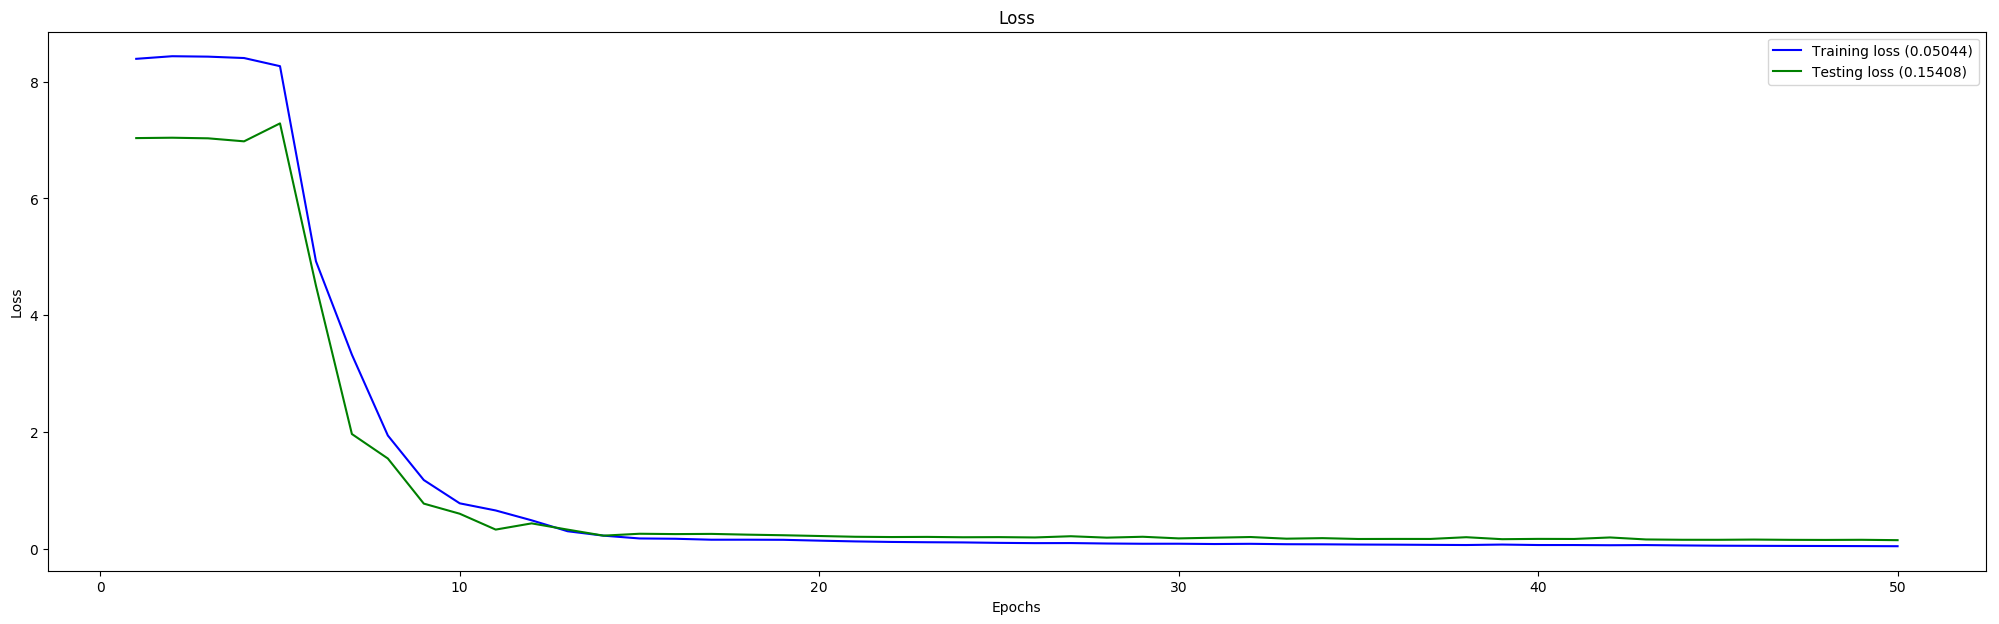

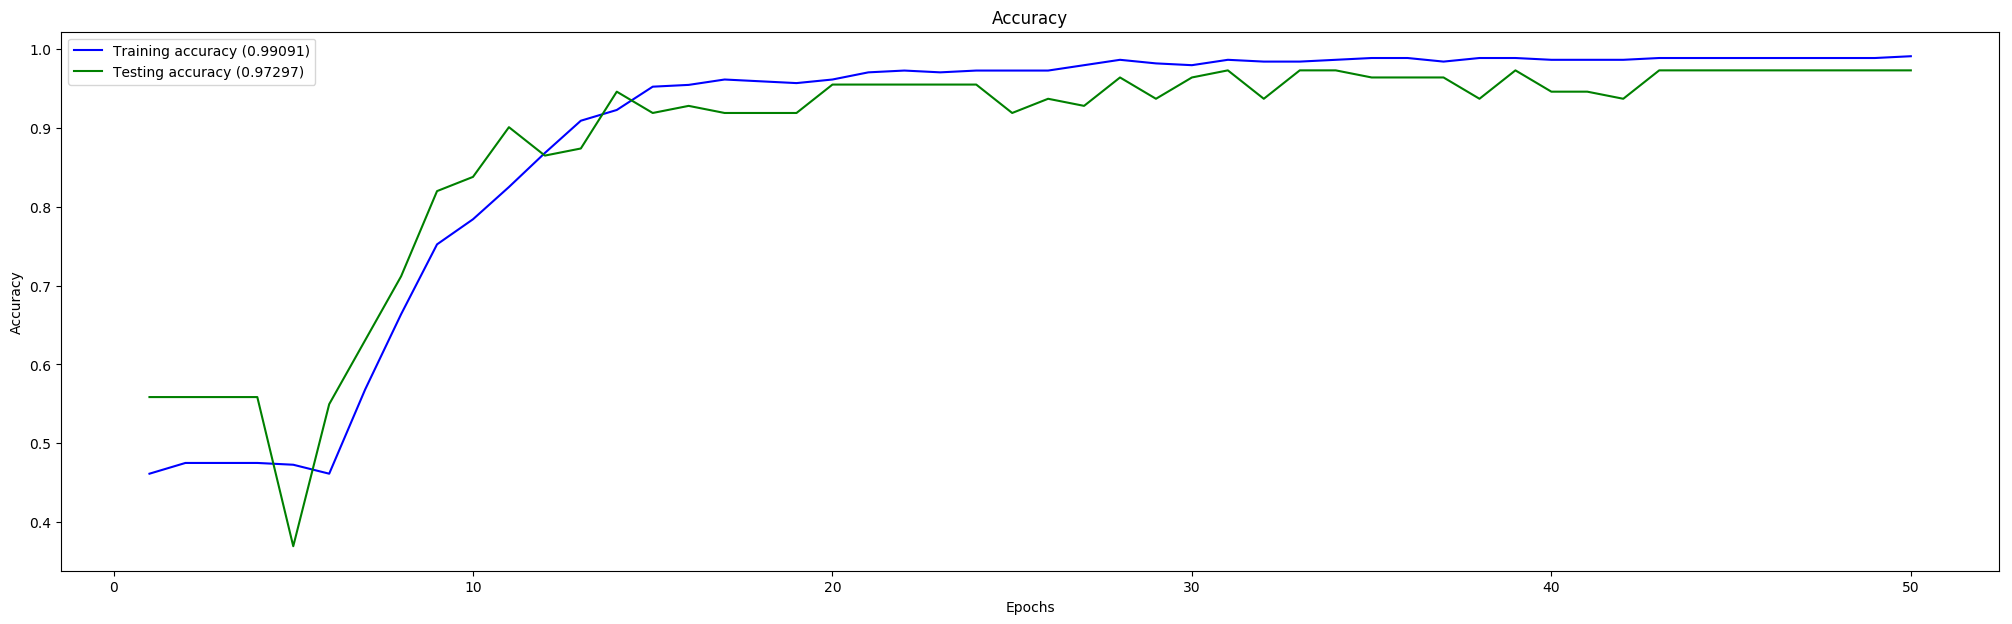

In [52]:
plot_history(history)

## Example of Mis-Classified Text

In order to show an example of mis-classified text, we first calculate the predicted sentiment for the first 1000 texts in the test-set.

In [53]:
%%time
y_pred = model.predict(x=x_test_pad,verbose=1)
#y_pred = y_pred.T[0]

111/111 [==============================] - 0s 2ms/step
CPU times: user 40.9 ms, sys: 106 µs, total: 41 ms
Wall time: 190 ms


In [54]:
cls_pred = np.array([1 if p>0.5 else 0 for p in y_pred])
cls_pred.shape

(111,)

In [55]:
np.array(y_test).shape

(111,)

In [56]:
from pycm import ConfusionMatrix

CM_FCN = ConfusionMatrix(y_test, cls_pred)
output = open('CM_FCN.pkl', 'wb')
pickle.dump(CM_FCN, output)
output.close()

print(CM_FCN)

Predict  0        1        
Actual
0        61       1        

1        2        47       





Overall Statistics : 

95% CI                                                            (0.94281,1.00314)
ACC Macro                                                         0.97297
AUNP                                                              0.97153
AUNU                                                              0.97153
Bennett S                                                         0.94595
CBA                                                               0.96372
Chi-Squared                                                       99.17511
Chi-Squared DF                                                    1
Conditional Entropy                                               0.17514
Cramer V                                                          0.94524
Cross Entropy                                                     0.99032
F1 Macro                                                     

In [11]:
file = open('CM_FCN.pkl', 'rb')
CM_FCN = pickle.load(file)
file.close()

In [12]:
CM_FCN.save_csv("CM-FCN",address=True)

{'Status': True,
 'Message': '/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IoT-Ensemble/FCN/CM-FCN.csv'}

In [57]:
CM_FCN.FP

{'0': 2, '1': 1}

In [58]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

y_pred = to_categorical(cls_pred)
print(y_pred.shape)

ytest = to_categorical(y_test)
print(ytest.shape)


(111, 2)
(111, 2)


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #print("False-Positive-Rate",argmax(fpr[i],axis=1))
    #print("True-Positive-Rate",argmax(tpr[i],axis=1))
    #print("ROC_AUC",argmax(roc_auc[i],axis=0))

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytest.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

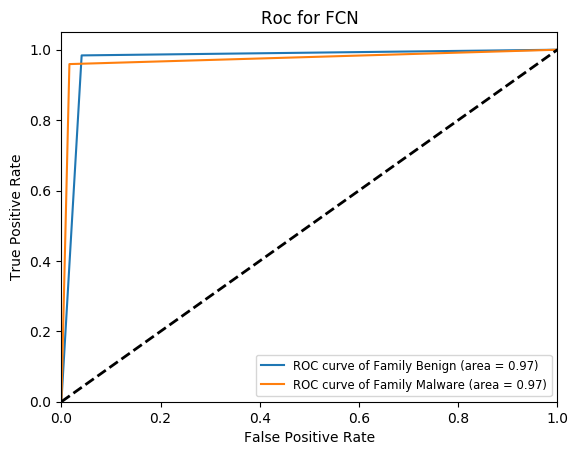

In [60]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

list_fams = ['Benign','Malware']
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
#plt.figure()
#plt.figure(figsize = (25,9))

#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["micro"]),
#         color='deeppink', linestyle=':', linewidth=4)

#plt.plot(fpr["macro"], tpr["macro"],
#         label='macro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["macro"]),
#         color='navy', linestyle=':', linewidth=4)


colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,25)]  

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], 
             label='ROC curve of Family {0} (area = {1:0.2f})'
             ''.format(list_fams[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc for FCN')
plt.legend(loc="lower right", fontsize='small')
plt.savefig('Roc for FCN.png', transparent=True)
plt.show()

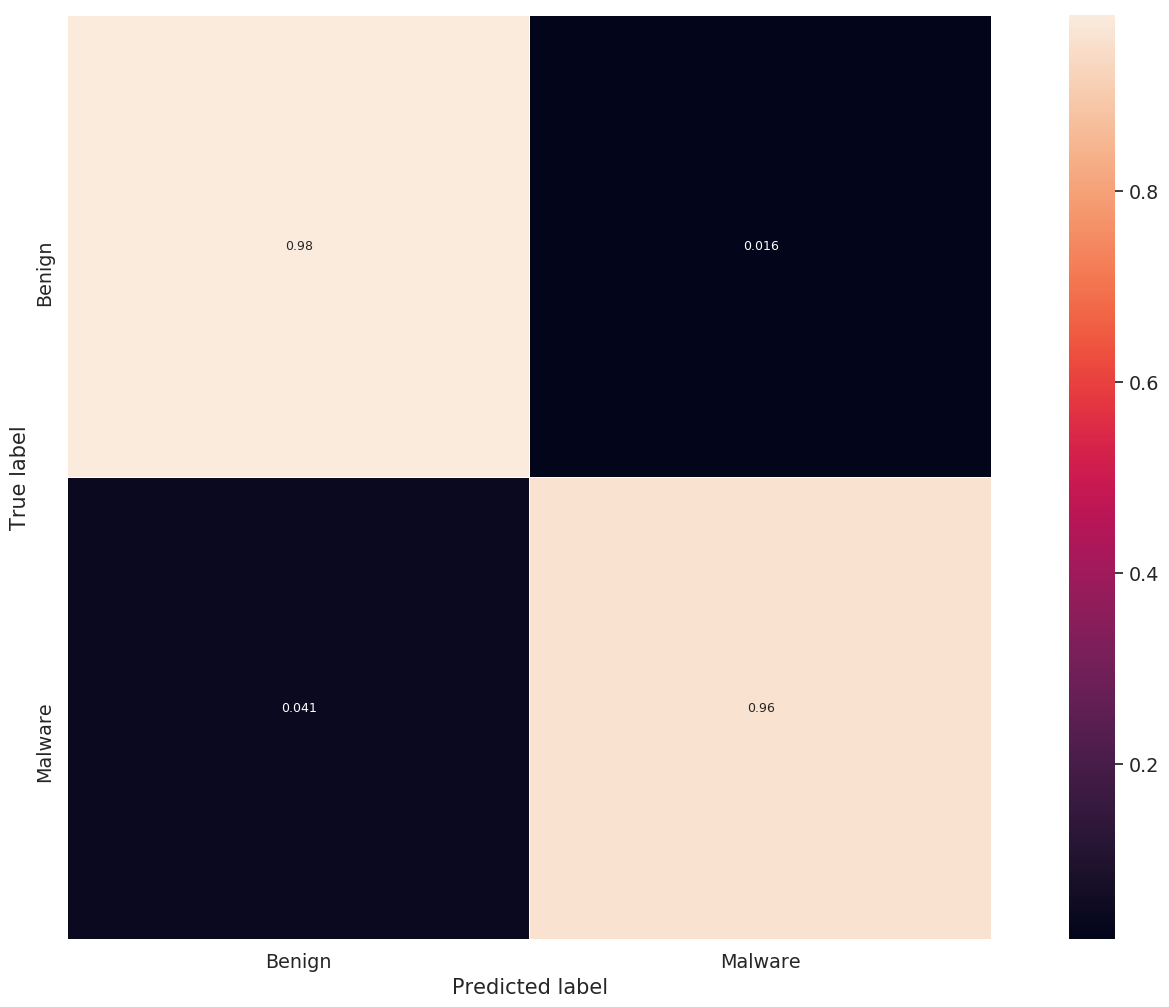

In [61]:
import seaborn as sns
list_fams = ['Benign','Malware']  

def plot_confusion_matrix(cls_pred):
    
    cm = confusion_matrix(y_true=y_test, y_pred=cls_pred)
    
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    
    figure = plt.gcf()
    figure.set_size_inches(20, 12)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 annot_kws={'size': 9}, linewidth = 0.1,
                 yticklabels=list_fams, xticklabels=list_fams)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig('VGG16-Fine-tuned-softmax-Confusion-matrix(loss=SGD).png', bbox_inches='tight')
    plt.show()
    
plot_confusion_matrix(cls_pred=cls_pred)

In [62]:
%%time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
cls_true = cls_test = y_test
accuracy = accuracy_score(cls_true, cls_pred)
precision, recall, f1_score, support = precision_recall_fscore_support(cls_true, cls_pred, average=None)

print("All Classes")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)
#print("Accuracy:",accuracy)

All Classes
Precision:  [ 0.96825397  0.97916667]
Recall:  [ 0.98387097  0.95918367]
F1 score:  [ 0.976       0.96907216]
CPU times: user 427 µs, sys: 6.28 ms, total: 6.7 ms
Wall time: 33.6 ms


In [63]:
%%time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
cls_true = cls_test = y_test
accuracy = accuracy_score(cls_true, cls_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(cls_true, cls_pred, average='micro')

print("Micro")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

Micro
Precision:  0.972972972973
Recall:  0.972972972973
F1 score:  0.972972972973
CPU times: user 3.94 ms, sys: 29 µs, total: 3.97 ms
Wall time: 9.14 ms


In [64]:
%%time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
cls_true = cls_test = y_test
accuracy = accuracy_score(cls_true, cls_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(cls_true, cls_pred, average='macro')

print("Macro")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

Macro
Precision:  0.97371031746
Recall:  0.971527320606
F1 score:  0.972536082474
CPU times: user 0 ns, sys: 3.19 ms, total: 3.19 ms
Wall time: 13.4 ms


In [65]:
%%time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
cls_true = cls_test = y_test
accuracy = accuracy_score(cls_true, cls_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(cls_true, cls_pred, average='weighted')

print("weighted")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

weighted
Precision:  0.973071285571
Recall:  0.972972972973
F1 score:  0.972941766509
CPU times: user 6.19 ms, sys: 107 µs, total: 6.29 ms
Wall time: 38.5 ms
